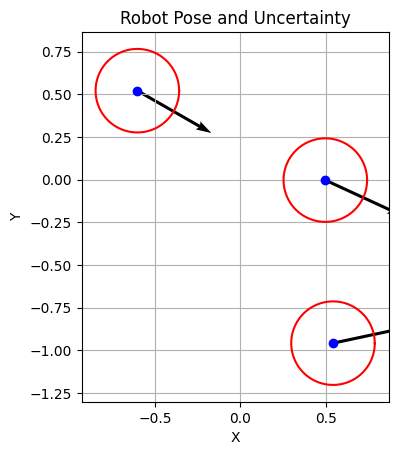

0
1
2


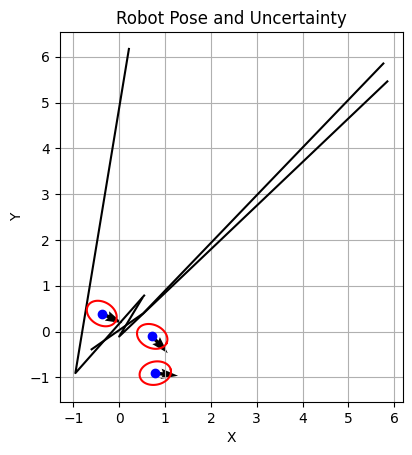

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Robot_w_dist_JLATT import Robot_w_dist_JLATT

# def main():
np.random.seed(10)  # for reproducibility

dt = 0.5
t_end = 25
t = np.arange(0, t_end + dt, dt)

x0 = np.array([1, 1, 0])

robot_num = 3
robot_set = [0 for _ in range(robot_num)]

sensor_variances = np.array([0.1, 0.1, 0.1])  # variances = [v_abs; v_r; v_t]
sensor_limits = np.array([15, 15])  # max_distances = [max_z_r; max_z_t]
sensor_prob = np.array([0.7, 0.7])
sensor_data = [sensor_variances, sensor_limits, sensor_prob]

max_connection_distance = 10
link_probabilities = np.array([0.7, 0.7])  # [abs_message_prob; rel_message_prob]
connection_data = [max_connection_distance, link_probabilities]

e_var0 = 0.01  # initial estimated error from the true position
process_var = 0.01  # variance of the process white noise
stat_data = [e_var0, process_var]

for j in range(robot_num):
    x0 = np.array([-1 + 2 * np.random.rand(),
                -1 + 2 * np.random.rand(),
                -np.pi / 4 + np.pi / 2 * np.random.rand()])
    robot_set[j] = Robot_w_dist_JLATT(x0, j, stat_data, sensor_data, connection_data, 0)

# Visualization
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    robot_set[j].draw_estimate()

plt.show()

# Propagation
for j in range(robot_num):
    robot_set[j].update(dt)

for j in range(robot_num):
    robot_set[j].simple_rel_meas(robot_set, t[0])

for j in range(robot_num):
    print(j)
    robot_set[j].simple_rel_com(robot_set, t[0])

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    ax.plot(robot_set[j].true_path[0], robot_set[j].true_path[1], 'k')
    triangle = robot_set[j].draw(1)
    ax.fill(triangle[0], triangle[1], color='blue')
    robot_set[j].draw_estimate()

plt.show()



0
0.0
(3, 3) (3, 1)
1
0.0
(3, 3) (3, 1)
2
0.0


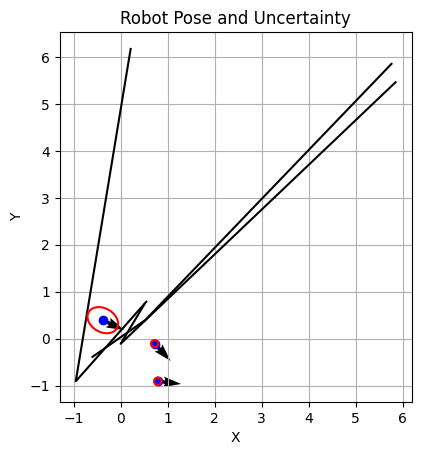

0
1
2
(3, 3) (3, 1)
(3, 3) (3, 1)
(3, 3) (3, 2)


ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [2]:
# Correction
for j in range(robot_num):
    print(j)
    print(t[0])
    print(robot_set[j])
    robot_set[j].simple_corrections(abs(t[0]))

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    ax.plot(robot_set[j].true_path[0], robot_set[j].true_path[1], 'k')
    triangle = robot_set[j].draw(1)
    ax.fill(triangle[0], triangle[1], color='blue')
    robot_set[j].draw_estimate()

plt.show()

# Simulation over time
robots_in_time = []

for i in range(len(t)):
    for j in range(robot_num):
        robot_set[j].update(dt)

    for j in range(robot_num):
        robot_set[j].simple_rel_meas(robot_set, t[0])

    for j in range(robot_num):
        print(j)
        robot_set[j].simple_rel_com(robot_set, t[0])

    for j in range(robot_num):
        robot_set[j].simple_corrections(t[0])

    robots_in_time.append(robot_set.copy())

# Graphs
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Robot's motion over time")
ax.grid(True)

for j in range(robot_num):
    ax.plot(robot_set[j].true_path[:, 0], robot_set[j].true_path[:, 1], color='blue', label=f'Robot {j}')
    triangle = robot_set[j].draw(1)
    ax.fill(triangle[:, 0], triangle[:, 1], color='red', alpha=0.5)
    triangle = robot_set[j].draw(len(robot_set[j].true_path[:, 0]))
    ax.fill(triangle[:, 0], triangle[:, 1], color='red', alpha=0.5)

ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for j in range(robot_num):
    ax.plot(robot_set[j].true_path[:, 0], robot_set[j].true_path[:, 1], color='blue', label=f'Robot {j}')
    robot_set[j].draw_estimate(ax)

plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

robot_to_check = 2

ax.plot(robots_in_time[-1][robot_to_check].true_path[:, 0], robots_in_time[-1][robot_to_check].true_path[:, 1], 'k')

for i in range(len(robots_in_time)):
    ax.plot(robots_in_time[i][robot_to_check].Pose_est[0], robots_in_time[i][robot_to_check].Pose_est[1], 'or')

plt.show()

fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Robot Pose and Uncertainty')

for i in range(len(robots_in_time)):
    robots_in_time[i][robot_to_check].draw_estimate(ax)

ax.plot(robots_in_time[-1][robot_to_check].true_path[:, 0], robots_in_time[-1][robot_to_check].true_path[:, 1], color='blue', label=f'Robot {robot_to_check}')
plt.legend()
plt.show()

# if _name_ == "_main_":
#     main()